In [1]:
import pandas as pd

In [2]:
df_hvg = pd.read_csv('/Users/pacohoche/Desktop/AI-1 Project/AI-1-Project-Single-Cell-/Data_CSV/hvg_data_clusters.csv', index_col=0)
df_hvg.head()

,Coro2b,Clec9a,Tmem167b,Rag2,Adgre1,Bhlhb9,Vcam1,Mns1,Tbc1d5,Sardh,...,Mzb1,Cables1,B4galt6,Impact,Taf4b,Zfp521,Hrh4,Psma8,cluster,cell_type
f8f4122d32,-0.459152,-0.146910,2.137775,3.327965,-0.265706,1.437795,0.405014,-0.679011,-0.703729,-0.133520,...,-0.391854,-0.502104,-0.159891,-0.926282,-1.002289,0.181816,-0.101194,2.288715,2.0,LMPP_broad
c547632b57,-0.459152,-0.146910,2.564433,-0.010832,-0.265706,-0.781545,-0.604030,-0.591253,1.743835,-0.133520,...,-0.391854,-0.502104,0.023667,1.117386,-0.528065,0.186905,-0.101194,-0.054558,NaN,NaN
c2e46e7dfc,-0.459152,-0.146910,-0.767338,-0.079042,-0.265706,-0.642470,-0.604030,0.143596,1.319571,-0.133520,...,-0.391854,-0.502104,2.392045,0.808135,-0.160130,1.572204,-0.101194,-0.599173,NaN,NaN
0710f78e38,-0.459152,-0.146910,-0.507284,-0.621492,-0.265706,-0.641621,-0.604030,1.864635,-1.285377,-0.133520,...,0.155889,1.469079,-0.875999,1.166535,-0.486395,-0.582101,-0.101194,-0.241778,3.0,LTHSC_broad
449e822f38,1.096180,3.078086,-0.767338,-0.621492,1.874920,-0.143184,1.136466,-0.525681,0.963805,2.856626,...,0.545174,-0.502104,-0.355352,1.401348,-0.469913,-0.582101,-0.101194,-0.599173,4.0,MEP_broad


In [3]:
# divide the data into the ones with labels and the ones without labels
df_hvg_labeled = df_hvg[df_hvg['cluster'].notna()]
df_hvg_unlabeled = df_hvg[df_hvg['cluster'].isna()]



<Axes: title={'center': 'Number of cells in each cluster'}, xlabel='cluster'>

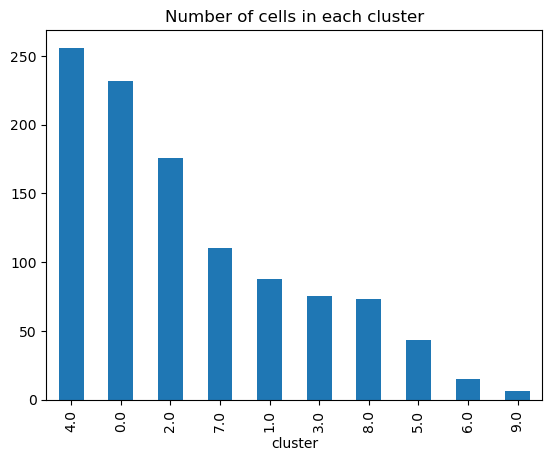

In [6]:
# count how many cells are in each cluster
cluster_counts = df_hvg_labeled['cluster'].value_counts()
# plot the counts as a bar plot
cluster_counts.plot(kind='bar', title='Number of cells in each cluster')

### This is a very important information, 
### We won't take it into account in the pre processing, since we don't want to manipulate the dataset too much, but in the models we will take it into account ! 

# MODELS 

### Random Forest

In [7]:
# we want to implement a random forest classifier to predict the cluster of each cell based on the gene expression data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# separate features and labels
X = df_hvg_labeled.drop(columns=['cluster', 'cell_type'])
y = df_hvg_labeled['cluster']
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# train the model
rf.fit(X_train, y_train)
# make predictions
y_pred = rf.predict(X_test)
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# # now we can use the model to predict the clusters of the unlabeled data
# X_unlabeled = df_hvg_unlabeled.drop(columns=['cluster', 'cell_type'])
# predicted_clusters = rf.predict(X_unlabeled)
# df_hvg_unlabeled['predicted_cluster'] = predicted_clusters
# df_hvg_unlabeled.head()
# # finally, we can save the predicted clusters to a csv file


[[35  1  8  0  3  0  0  2  0  0]
 [ 9  5  0  0  0  0  0  0  0  0]
 [ 2  0 34  1  0  0  0  1  0  0]
 [ 1  0  0 11  2  0  0  0  2  0]
 [ 9  0  0  0 36  0  0  0  0  0]
 [ 0  0  6  4  0  0  0  2  0  0]
 [ 1  0  3  0  1  0  0  0  0  0]
 [ 5  0 13  0  0  0  0  0  0  0]
 [ 2  0 10  4  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.55      0.71      0.62        49
         1.0       0.83      0.36      0.50        14
         2.0       0.46      0.89      0.61        38
         3.0       0.55      0.69      0.61        16
         4.0       0.82      0.80      0.81        45
         5.0       0.00      0.00      0.00        12
         6.0       0.00      0.00      0.00         5
         7.0       0.00      0.00      0.00        18
         8.0       0.00      0.00      0.00        16
         9.0       0.00      0.00      0.00         2

    accuracy                           0.56       215
   macro avg       

/opt/anaconda3/envs/AI_LAB/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/AI_LAB/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/AI_LAB/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

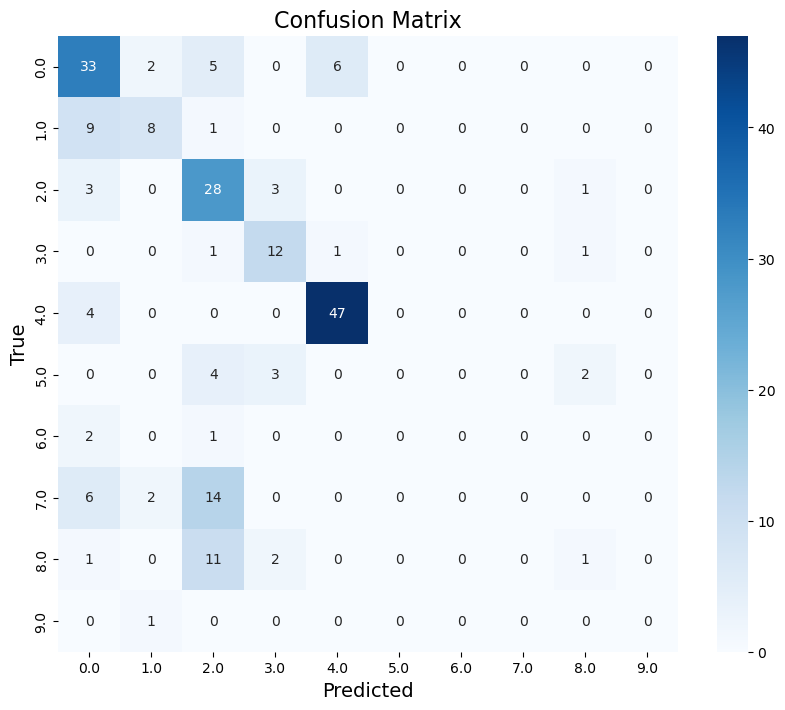

              precision    recall  f1-score   support

         0.0      0.569     0.717     0.635        46
         1.0      0.615     0.444     0.516        18
         2.0      0.431     0.800     0.560        35
         3.0      0.600     0.800     0.686        15
         4.0      0.870     0.922     0.895        51
         5.0      0.000     0.000     0.000         9
         6.0      0.000     0.000     0.000         3
         7.0      0.000     0.000     0.000        22
         8.0      0.200     0.067     0.100        15
         9.0      0.000     0.000     0.000         1

    accuracy                          0.600       215
   macro avg      0.329     0.375     0.339       215
weighted avg      0.506     0.600     0.537       215



/opt/anaconda3/envs/AI_LAB/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/AI_LAB/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/AI_LAB/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# 1) Separate features and labels
X = df_hvg_labeled.drop(columns=['cluster', 'cell_type'])
y = df_hvg_labeled['cluster']

# 2) Train/test split WITH stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y          # <--- important with imbalance
)

# 3) Create the model WITH class weights
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'   # <--- key line
)

# 4) Train
rf.fit(X_train, y_train)

# 5) Predict
y_pred = rf.predict(X_test)

# 6) Evaluate
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=sorted(y.unique()),
    yticklabels=sorted(y.unique())
)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.show()
print(classification_report(y_test, y_pred, digits=3))


## This is a very very good finding, RF Performs very very poorly on thousands of genes ! 

### Regularzed Logistic 


## Logistic reg with CV 

In [ ]:
X = df_hvg_labeled.drop(columns=['cluster', 'cell_type']).values
y = df_hvg_labeled['cluster'].astype(int)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        multi_class="multinomial",
        class_weight="balanced",
        max_iter=5000,
        n_jobs=-1))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(
    pipe, X, y, cv=cv,
    scoring=["accuracy", "f1_macro"],
    n_jobs=-1
)

print(scores["test_accuracy"].mean())
print(scores["test_f1_macro"].mean())

# pipe.fit(X, y)
# predicted_clusters = pipe.predict(X_unlabeled)
# df_hvg_unlabeled['predicted_cluster'] = predicted_clusters
# df_hvg_unlabeled.head()
# finally, we can save the predicted clusters to a csv file
# df_hvg_unlabeled.to_csv('/Users/pacohoche/Desktop/AI-1 Project/AI-1-Project-Single-Cell-/Data_CSV/hvg_unlabeled_predicted_clusters.csv')



/opt/anaconda3/envs/AI_LAB/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/AI_LAB/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/AI_LAB/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/AI_LAB/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: F

0.5893979569658769
0.3882978550125788
